In [63]:
import pandas as pd
import sqlite3
import re
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud

In [64]:
df = pd.read_csv('tweets.csv', sep=';')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [65]:
clean_desc = []
for w in range(len(df.tweet)):
    desc = df['tweet'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)#assign the cleaned descriptions to the data frame
df['tweet'] = clean_desc
        
df.head(3)

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i can t use ...
2,3,0,bihday your majesty


In [66]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

In [67]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(df['tweet']))#plot the word cloud

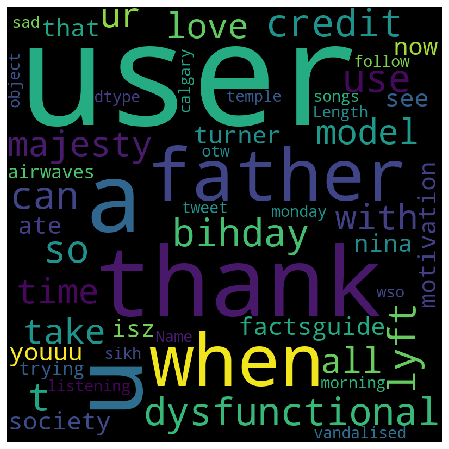

In [68]:
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()